In [2]:
import pandas as pd
import plotly.express as px
import os

In [3]:
folder_dir = r'D:\BUL\lab-1\result-three'
file_list = os.listdir(folder_dir)

df = pd.DataFrame(columns=['file_name', 'microseconds', 'distance[cm]'])

for file in file_list:
    if file.endswith('.csv'):
        file_name = file.split('.')[0]
        t = pd.read_csv(os.path.join(folder_dir, file))
        t['file_name'] = file_name
        #rename raw data to microseconds
        t = t.rename(columns={'raw_data': 'microseconds'})
        df = pd.concat([df, t], ignore_index=True)
        filename = file.split('.')[0]
        df = df.drop(columns=['Unnamed: 0'])

display(df)

,file_name,microseconds,distance[cm]
0,0cm,168339,2861.763
1,0cm,168428,2863.276
2,0cm,169240,2877.080
3,0cm,168968,2872.456
4,0cm,168721,2868.257
...,...,...,...
1207,90cm,5098,86.666
1208,90cm,5145,87.465
1209,90cm,5097,86.649
1210,90cm,5097,86.649


In [4]:
for row in df.iterrows():
    expected_distance = int(row[1]['file_name'].split('cm')[0])
    df.loc[row[0], 'expected_distance[cm]'] = expected_distance
df['speed[m/s]'] = df['expected_distance[cm]'] * 2 * 10000 / (df['microseconds'])

display(df)

,file_name,microseconds,distance[cm],expected_distance[cm],speed[m/s]
0,0cm,168339,2861.763,0.0,0.0
1,0cm,168428,2863.276,0.0,0.0
2,0cm,169240,2877.080,0.0,0.0
3,0cm,168968,2872.456,0.0,0.0
4,0cm,168721,2868.257,0.0,0.0
...,...,...,...,...,...
1207,90cm,5098,86.666,90.0,353.079639
1208,90cm,5145,87.465,90.0,349.854227
1209,90cm,5097,86.649,90.0,353.148911
1210,90cm,5097,86.649,90.0,353.148911


In [5]:
#creat a histogram per file_name
for file_name in df['file_name'].unique():
    df_temp = df[df['file_name'] == file_name]
    fig = px.histogram(df_temp, x='distance[cm]', nbins=100)
    fig.update_layout(title_text=file_name)
    fig.show()

In [ ]:
#plot mean values per file
df_mean = df.groupby('file_name').mean()
#drop 0cm distance
df_mean = df_mean.drop(index='0cm')
df_mean = df_mean.reset_index().sort_values(by='distance[cm]')
#add the actual distance as a secondary row
df_mean['real_distance[cm]'] = df_mean['file_name'].apply(lambda x: int(x.split('cm')[0]))
fig = px.scatter(df_mean, x='real_distance[cm]', y='distance[cm]', trendline='ols')
fig.show()

In [6]:
#speed of sound by mean 
df_speed = df[['expected_distance[cm]', 'speed[m/s]']].groupby('expected_distance[cm]').mean()
#drop were expected_distance is 0.0
df_speed = df_speed.drop(index=0.0)
df_speed = df_speed.drop(index=1.0)
fig = px.scatter(df_speed, x=df_speed.index, y='speed[m/s]', trendline='ols')
fig.update_layout(title_text='speed of sound by mean')
#add more ticks in x axis
fig.update_xaxes(dtick=10)
fig.update_yaxes(dtick=5)
fig.show()

In [9]:
#relative error to the speed of sound 
df_speed['relative_error'] = (df_speed['speed[m/s]'] - 343) / 343
#relative error as percentage
df_speed['relative_error[%]'] = df_speed['relative_error'] * 100
fig = px.scatter(df_speed, x=df_speed.index, y='relative_error', trendline='ols')
fig.update_layout(title_text='relative error to the speed of sound')
#print to markdown
print(df_speed.to_markdown())

|   expected_distance[cm] |   speed[m/s] |   relative_error |   relative_error[%] |
|------------------------:|-------------:|-----------------:|--------------------:|
|                      10 |      390.617 |        0.138827  |            13.8827  |
|                      20 |      364.852 |        0.063707  |             6.3707  |
|                      30 |      359.884 |        0.0492251 |             4.92251 |
|                      40 |      355.892 |        0.0375857 |             3.75857 |
|                      50 |      353.316 |        0.0300761 |             3.00761 |
|                      60 |      353.221 |        0.0297987 |             2.97987 |
|                      70 |      351.547 |        0.0249181 |             2.49181 |
|                      80 |      351.633 |        0.0251683 |             2.51683 |
|                      90 |      351.634 |        0.0251723 |             2.51723 |
|                     100 |      350.578 |        0.0220933 |             2.

In [ ]:
#calculate the relative error for each file
df_mean['relative_error'] = (df_mean['distance[cm]'] - df_mean['real_distance[cm]']) / df_mean['real_distance[cm]']
fig = px.scatter(df_mean, x='real_distance[cm]', y='relative_error')
fig.show()
#make a table with the relative error for markdown
print(df_mean[['real_distance[cm]', 'relative_error']].round(3).to_markdown(index=False))


In [18]:
result_dir = r'D:\BUL\lab-1'

files = os.listdir(result_dir)
count_diagonal = 0
count_horizontal = 0
df = pd.DataFrame(columns=['file_name', 'microseconds', 'distance[cm]'])
for file in files:
    if file.endswith('diagonal.csv'):
        count_diagonal += 1
        print('diagponal: ', file)
    elif file.endswith('.csv'):
        count_horizontal += 1
        print('horizontal: ', file)
    

horizontal:  100cm.csv
horizontal:  50cm0.csv
diagponal:  50cm0diagonal.csv
horizontal:  50cm1.csv
horizontal:  50cm10.csv
diagponal:  50cm10diagonal.csv
horizontal:  50cm11.csv
diagponal:  50cm11diagonal.csv
horizontal:  50cm12.csv
diagponal:  50cm12diagonal.csv
horizontal:  50cm13.csv
diagponal:  50cm13diagonal.csv
diagponal:  50cm1diagonal.csv
horizontal:  50cm2.csv
diagponal:  50cm2diagonal.csv
horizontal:  50cm3.csv
diagponal:  50cm3diagonal.csv
horizontal:  50cm4.csv
diagponal:  50cm4diagonal.csv
horizontal:  50cm5.csv
diagponal:  50cm5diagonal.csv
horizontal:  50cm6.csv
diagponal:  50cm6diagonal.csv
horizontal:  50cm7.csv
diagponal:  50cm7diagonal.csv
horizontal:  50cm8.csv
diagponal:  50cm8diagonal.csv
horizontal:  50cm9.csv
diagponal:  50cm9diagonal.csv
horizontal:  50cmcircular.csv
diagponal:  50cmdiagonal.csv
count_diagonal:  15
count_horizontal:  16


In [ ]:
files_dir = r'D:\BUL\lab-1\results'

[[26 79  1 12 86]
 [87  0  8 96 84]
 [ 0 52 84 66 14]
 [88 34 22 69 72]]


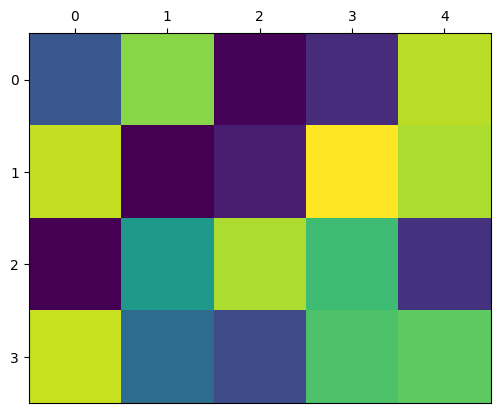

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import random
#draw heat map grid for random values in a grid of 10x10

#generate random values
#the grid with be 4x5
random_values = np.random.randint(0, 100, size=(4, 5))

#set value on 1,1 to 0
random_values[1, 1] = 0
print(random_values)


fig, ax = plt.subplots()

#change the ticks to 0 to 4
ax.set_xticks(np.arange(0, 5, 1))
ax.set_yticks(np.arange(0, 4, 1))

#set the x axis to be on top
ax.xaxis.tick_top()
im = ax.imshow(random_values)


